# **Importing Libraries**

In [12]:
import numpy as np
from numpy import math
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# **Uploading Data**

In [13]:
df=pd.read_csv('boston_data.csv')

# **Data Transfromation**

In [14]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price per $1000
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# check for missing values in all the columns
df.isnull().sum()

Unnamed: 0         0
CRIM               0
ZN                 0
INDUS              0
CHAS               0
NOX                0
RM                 0
AGE                0
DIS                0
RAD                0
TAX                0
PTRATIO            0
B                  0
LSTAT              0
Price per $1000    0
dtype: int64

In [16]:
df.drop('AGE',axis=1,inplace=True)
df.drop('INDUS',axis=1,inplace=True)
df.drop('NOX',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
df.head()

,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price per $1000
0,0.00632,18.0,0.0,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.0,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.0,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.0,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.0,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# **Splitting Data into Training and Testing Data**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 10)
(167, 10)
(339,)
(167,)


# **Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Building Linear Regression Model**

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
Y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[37.51 37.6 ]
 [31.27 27.9 ]
 [26.43 22.6 ]
 [ 5.11 13.8 ]
 [33.27 35.2 ]
 [ 5.29 10.4 ]
 [28.16 23.9 ]
 [29.19 29.  ]
 [25.78 22.8 ]
 [21.58 23.2 ]
 [31.25 33.2 ]
 [22.43 19.  ]
 [23.57 20.3 ]
 [33.47 36.1 ]
 [28.17 24.4 ]
 [15.31 17.2 ]
 [-1.58 17.9 ]
 [21.87 19.6 ]
 [14.01 19.7 ]
 [11.02 15.  ]
 [ 1.04  8.1 ]
 [20.34 23.  ]
 [38.17 44.8 ]
 [24.59 23.1 ]
 [31.4  32.2 ]
 [12.03 10.8 ]
 [25.15 23.1 ]
 [22.53 21.2 ]
 [24.28 22.2 ]
 [21.89 24.1 ]
 [16.51 17.3 ]
 [ 5.74  7.  ]
 [17.98 12.7 ]
 [23.71 17.8 ]
 [28.13 26.4 ]
 [19.65 19.6 ]
 [27.86 25.1 ]
 [ 8.7   8.3 ]
 [42.77 48.8 ]
 [34.09 34.9 ]
 [20.52 13.8 ]
 [ 3.3  14.4 ]
 [29.42 30.1 ]
 [12.92 12.7 ]
 [26.9  27.1 ]
 [30.49 24.8 ]
 [-6.73  7.  ]
 [20.88 20.5 ]
 [24.64 21.5 ]
 [13.35 14.  ]
 [19.62 20.4 ]
 [19.98 22.2 ]
 [22.34 21.4 ]
 [13.73 13.5 ]
 [20.7  19.4 ]
 [25.8  24.7 ]
 [34.23 43.8 ]
 [16.19 14.1 ]
 [28.06 28.6 ]
 [21.65 19.7 ]
 [20.5  16.8 ]
 [25.3  23.2 ]
 [15.01 16.2 ]
 [32.73 41.3 ]
 [22.15 22.7 ]
 [12.39  8.3 ]
 [20.45 18

#**Statistics**

In [23]:
regressor.coef_

array([-1.22,  1.04,  0.08,  2.81, -1.91,  2.99, -3.04, -1.85,  1.03,
       -3.76])

In [24]:
math.sqrt(mean_squared_error(Y_test,Y_pred))

5.481236623014403

In [25]:
r2_score(Y_test,Y_pred)

0.6795101488291075

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 3.5599688083789793
MSE: 30.043954917474334
RMSE: 5.481236623014403


# **Visualization**

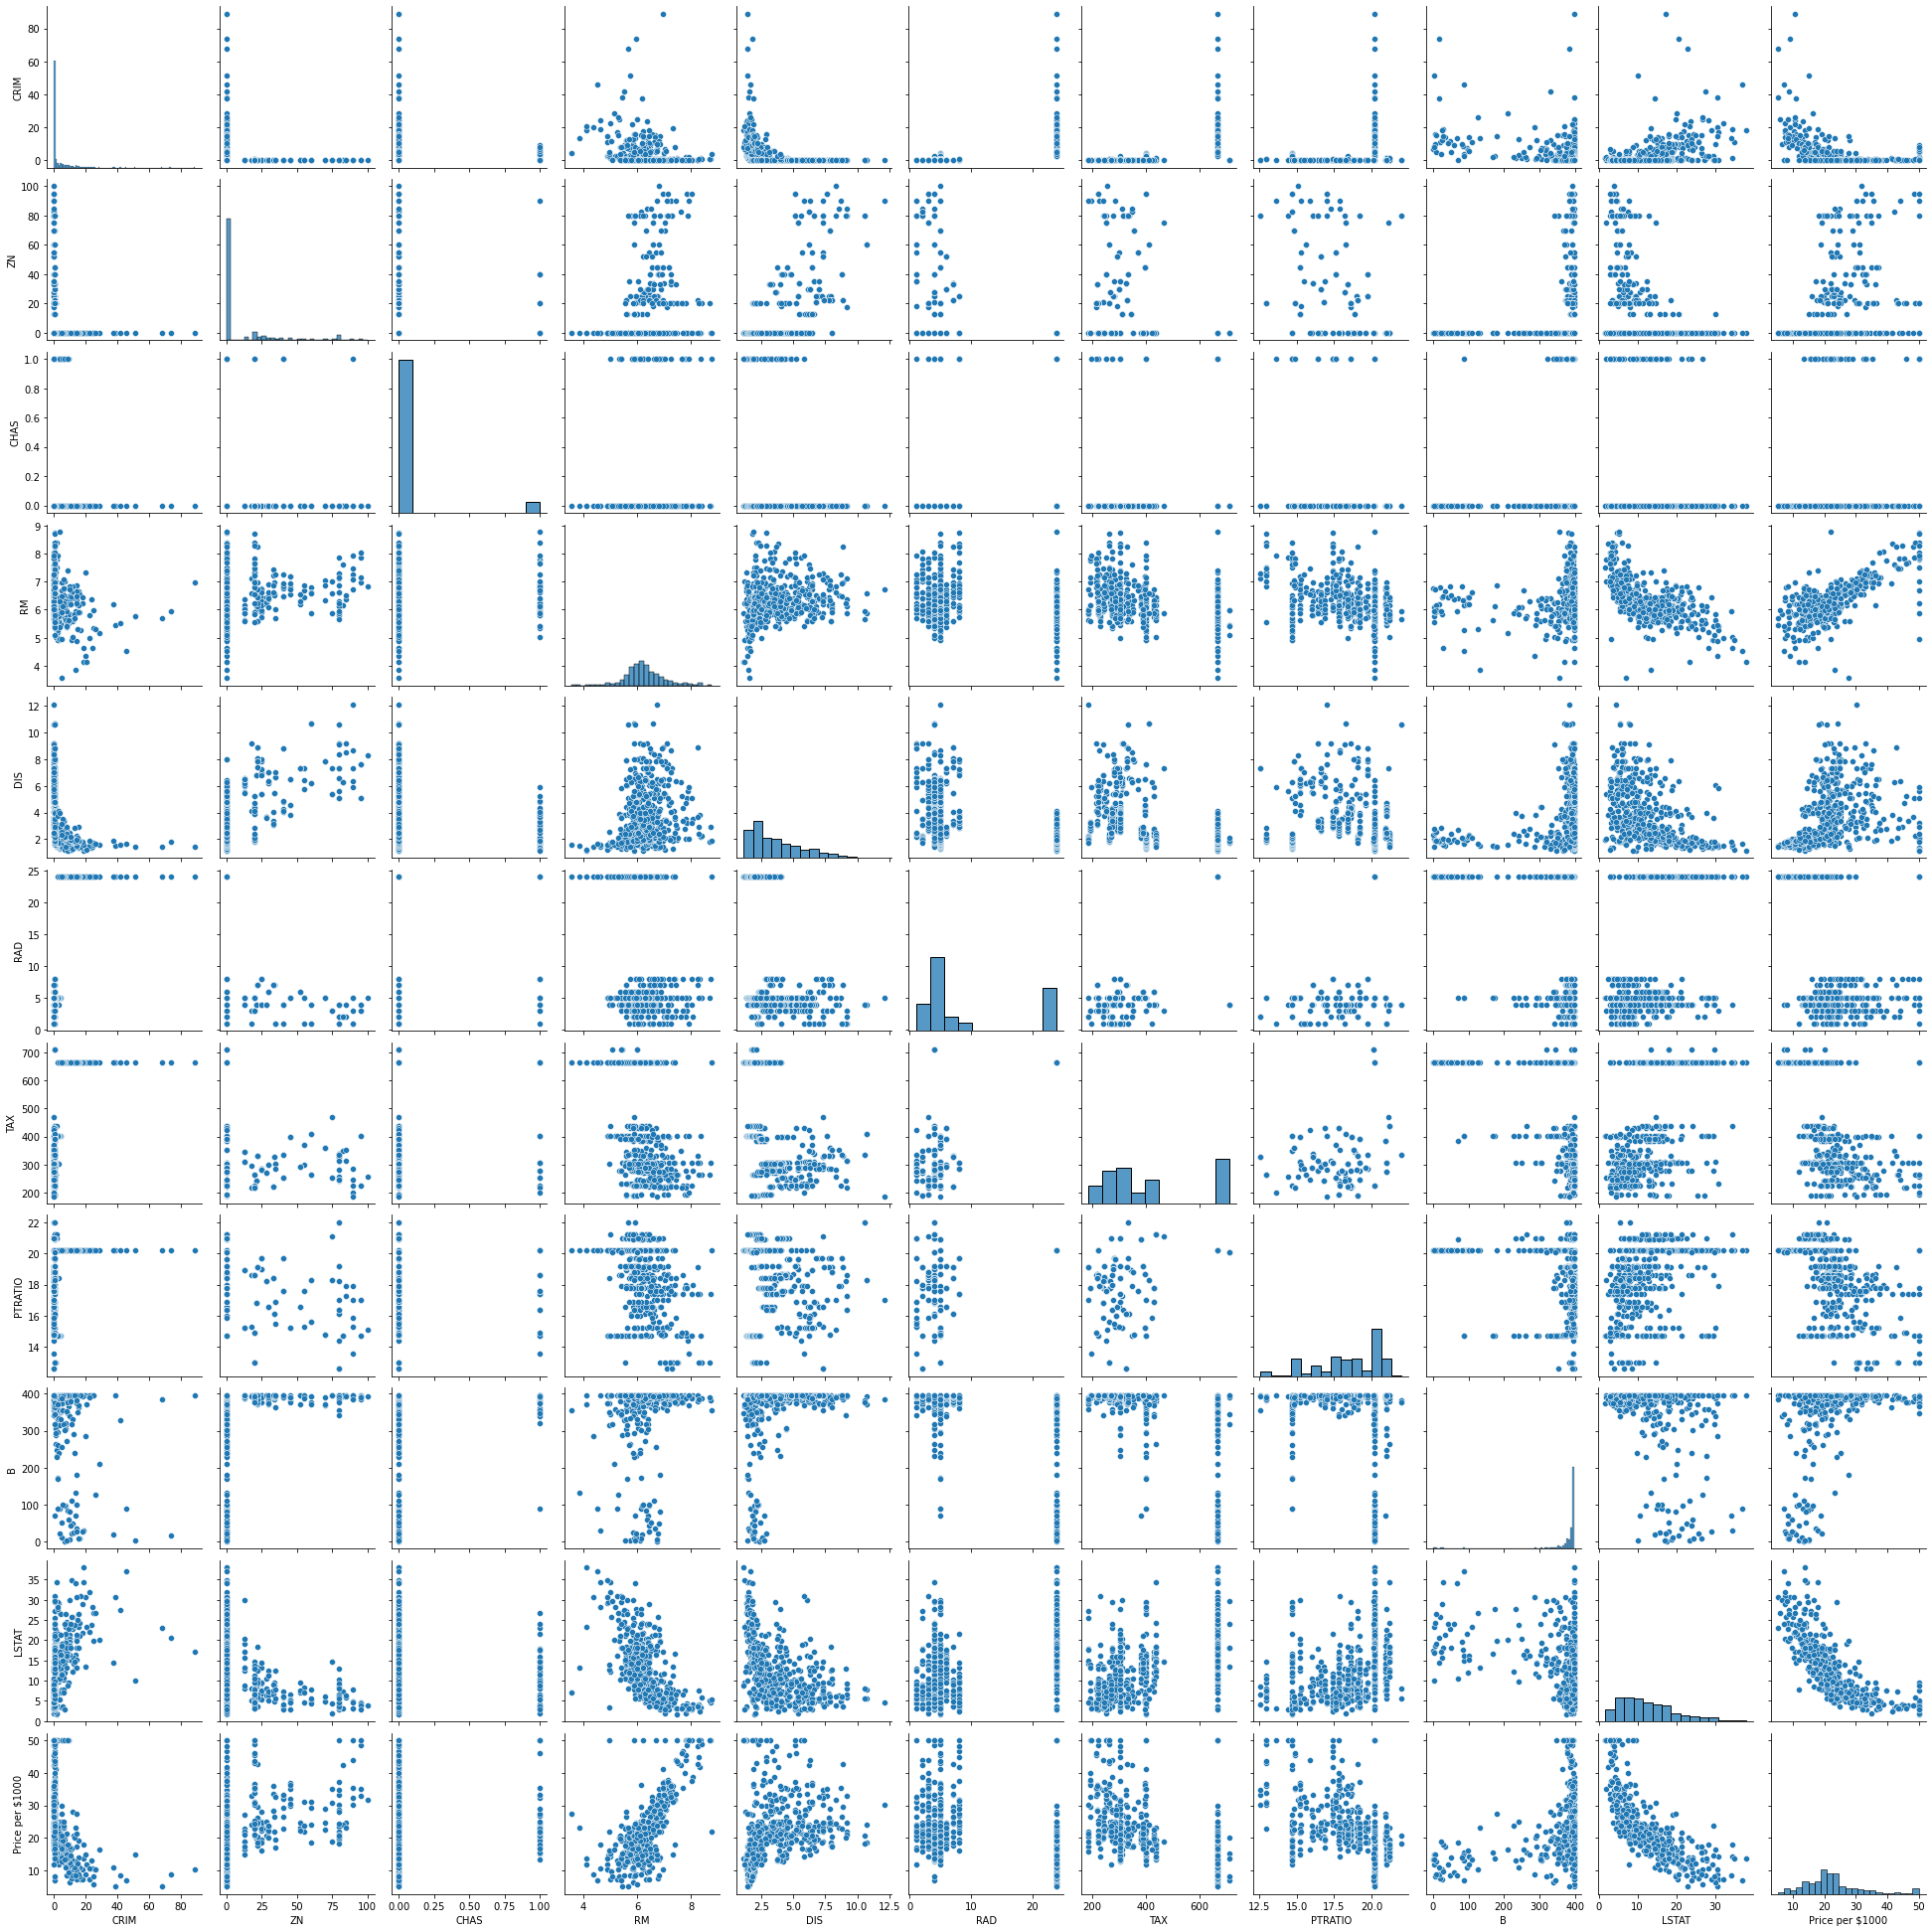

In [27]:
sns.pairplot(df)

C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aryan\anacond

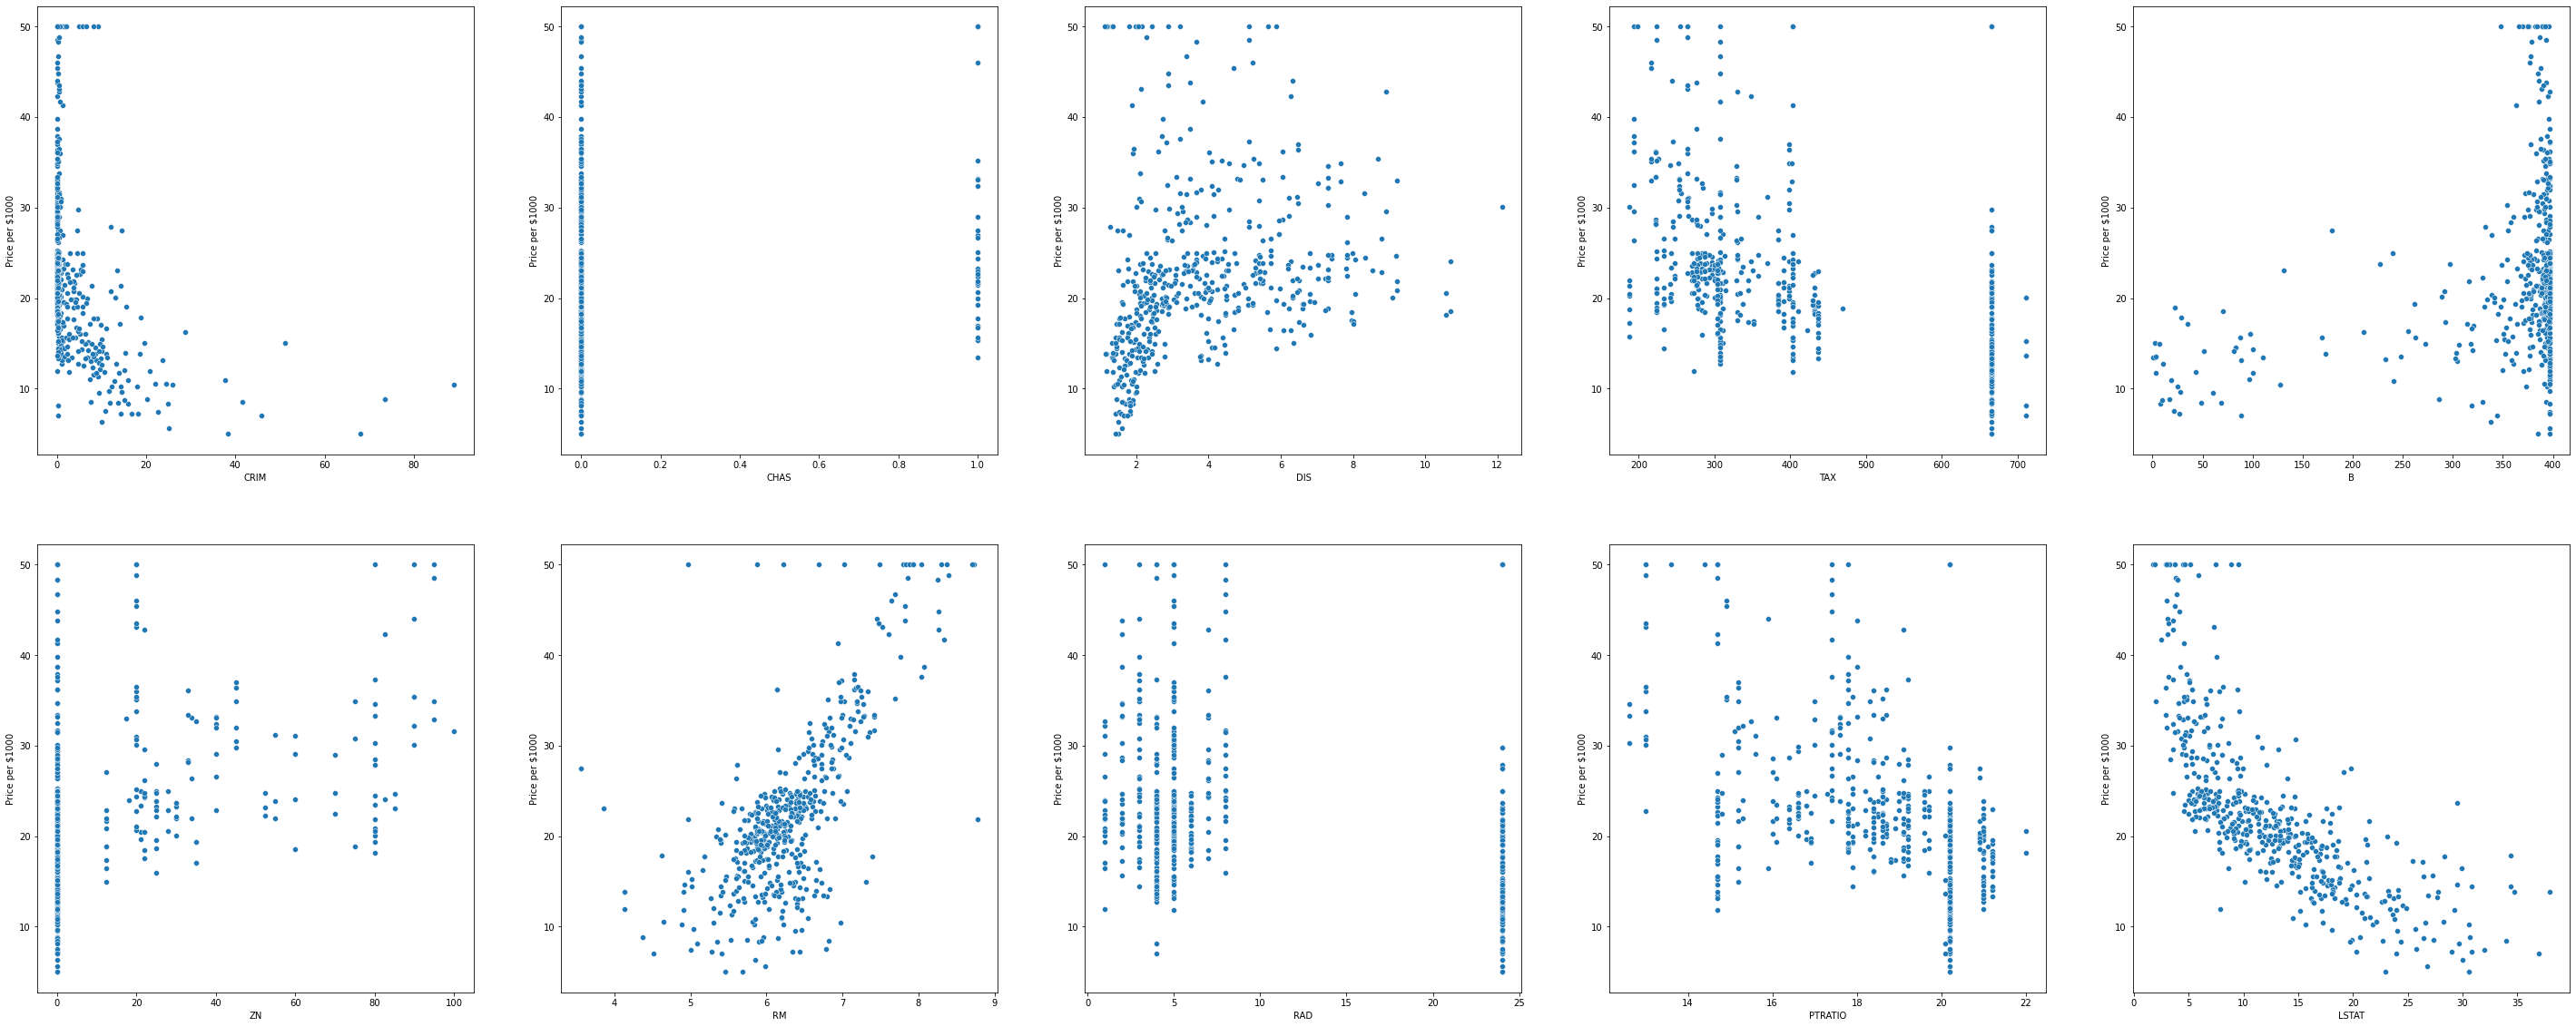

In [28]:
fig, axs = plt.subplots(2, 5,figsize=(50,20),)
sns.scatterplot(df['CRIM'], df['Price per $1000'], ax = axs[0,0])
sns.scatterplot(df['ZN'], df['Price per $1000'], ax = axs[1,0])
sns.scatterplot(df['CHAS'], df['Price per $1000'], ax = axs[0,1])
sns.scatterplot(df['RM'], df['Price per $1000'], ax = axs[1,1])
sns.scatterplot(df['DIS'], df['Price per $1000'], ax = axs[0,2])
sns.scatterplot(df['RAD'], df['Price per $1000'], ax = axs[1,2])
sns.scatterplot(df['TAX'], df['Price per $1000'], ax = axs[0,3])
sns.scatterplot(df['PTRATIO'], df['Price per $1000'], ax = axs[1,3])
sns.scatterplot(df['B'], df['Price per $1000'], ax = axs[0,4])
sns.scatterplot(df['LSTAT'], df['Price per $1000'], ax = axs[1,4])
plt.show()

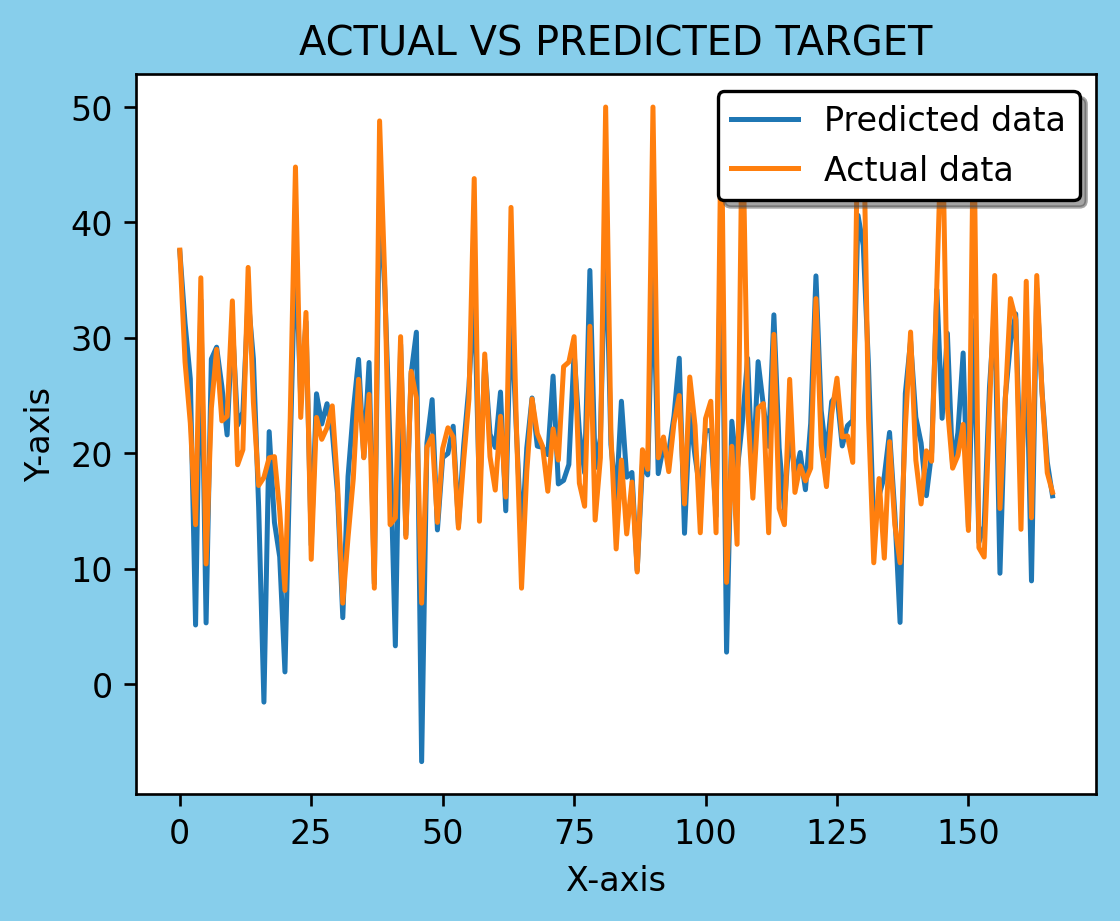

In [29]:
fig = plt.figure(figsize =(4, 3),dpi=240,facecolor='skyblue',edgecolor='black')
ax1 = fig.add_axes([1, 1, 1, 1],xlabel='X-axis',ylabel='Y-axis',title='ACTUAL VS PREDICTED TARGET')



plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(['Predicted data','Actual data'],facecolor='w',loc='upper right',shadow=True,edgecolor='black' )